### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import the necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [3]:
# are there any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.describe

<bound method NDFrame.describe of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     

In [5]:
reviews.shape

(2000, 11)

## 2. Drop columns

In [6]:
# Keep only the necessary columns.
reviews = reviews.drop(labels=['language', 'platform'], axis=1)

In [7]:
# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [8]:
# Rename the column headers to simple names
reviews1 = reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.

In [9]:
reviews1.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
reviews1.to_csv('reviews2.csv', index=False)

In [11]:
# Import new CSV file with Pandas.
reviews3 = pd.read_csv('reviews2.csv')

# View DataFrame.
reviews3.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [12]:
reviews3.shape

(2000, 9)

In [13]:
reviews3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

### 5a) spending vs loyalty

In [14]:
# create an independent variable.
x = reviews3['spending_score'].values.reshape(-1, 1)

# create an dependent variable.
y = reviews3['loyalty_points'].values.reshape(-1, 1)

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews3).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):          2.92e-263
Time:                        18:32:12   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [16]:
# Set the X coefficient and the constant to generate the regression table.
# coefficient = 33.061693 and constant = -75.052663
y_pred = (-75.052663) + 33.061693 * reviews3['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

### Create a plot with a regression line through it

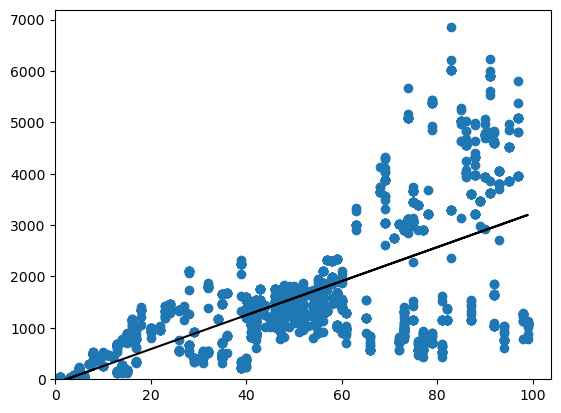

In [17]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred, color='black')

plt.xlim(0)
plt.ylim(0)

plt.show()

#### the above plot was created to illustrate the inefficiency of the model and the inability of the model to explain the correlation between spending of a customer to the loyalty points that they earn through spending alone. th emedian line goes through data points which are widely scattered and thus showing many "outliers" which is fact may not be outliers and hence will skewer ther analysis. The points which are closely clustered around the line are scattered enough as to make wrong conclusions. Thus trying to connect spending of a customer to loyalty points earned is  incorrect. Tis is also shown by the R squared value which is lesser than 0.5 and hence the model is unable to explain the correlation between spending and loyalty and can be discarded.

### 5b) renumeration vs loyalty

In [18]:
# create an independent variable x
x = reviews3['remuneration'].values.reshape(-1, 1)

# create an dependent variable y
y = reviews3['loyalty_points'].values.reshape(-1, 1)

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews3).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):          2.43e-209
Time:                        18:32:12   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [20]:
# Set the the X coefficient and the constant to generate the regression table.
# Set the the coefficient to 34.187825 and the constant to -65.686513.
y_pred1 = (-65.686513) + 34.187825 * reviews3['remuneration']

# View the output.
y_pred1

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

### Create a graph with a regression line

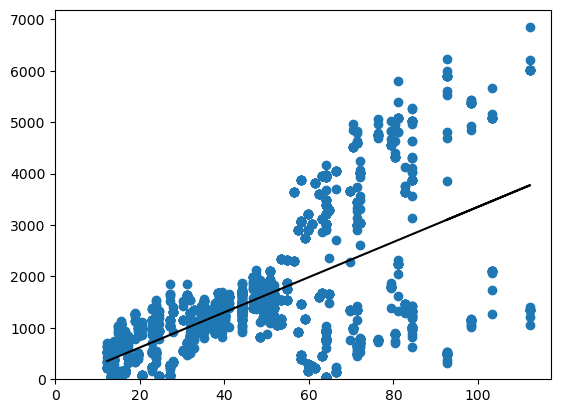

In [21]:
# Plot graph with regression line.
plt.scatter(x, y)

plt.plot(x, y_pred1, color='black')

plt.xlim(0)
plt.ylim(0)

plt.show()

#### A different approach was tried by comparing the remuneration earned by cusotmers and the corresponding loyalty points earned. Again the result is the same as trying comparison of spending and loyalty. the points are scattered and the median line only runs through a initial number of points all clustered around the low remuneration level, which gives a confusing picture. The other plotted points which are in the higher remuneration bracket give a different picture in terms of loyalty points earned as it can be seen it is not necessary that higher earning will translate to more points earned. in fact it moght be the case where people in higher earning bracket are actually spending less and making fewer pruchases but which are of a higher value and the lower income bracket making regular purchses spending less but shopping more frequently thus accruing points. This comparison can also be discarded as the R squared value which gives an indication of the model being able to explaing the correlation is lower than 0.5. 

### 5c) age vs loyalty

In [22]:
# create an independent variable.
x = reviews3['age'].values.reshape(-1, 1)

# create an dependent variable.
y = reviews3['loyalty_points'].values.reshape(-1, 1)

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews3).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 27 Nov 2022   Prob (F-statistic):             0.0577
Time:                        18:32:12   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [24]:
# Set the X coefficient and the constant to generate the regression table.
# Set the the coefficient to -4.012805 and the constant to 1736.517739.
y_pred2 = (1736.517739) + -4.012805 * reviews3['age']

# View the output.
y_pred2

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

### create a graph with a regression line

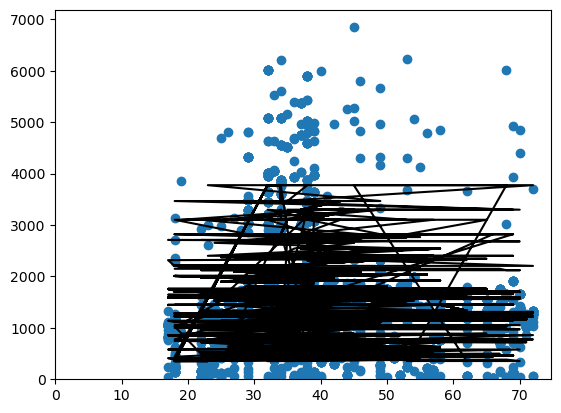

In [25]:
# Plot graph with regression line.
plt.scatter(x, y)

plt.plot(x, y_pred1, color='black')

plt.xlim(0)
plt.ylim(0)

plt.show()

#### the above plot was created to understand perhaps there is a correlation between Age of cusotmer and the corresponding loyalty points earned. It can be seen as a complete mismatch and the model can be considered a non-starter as there is absolutely no correlation between age and points as people of all ages can buy more or less and their buying decisons will depend upon more of disposable income and prfered lifestyle than just age, as no longer in today's age a product can be classified for a particular age and it depends more on income levels, lifestyle and thus associated preferences for certain type of products. Understandably the R squared score is so low that evena graph is not needed to see whether the model can be considered. 

## 6. Observations and insights

### As can be seen form the above 3 graphs plotted, there are many outliers, which will need investigating, the R squared value is also less than 50% which means the model created is not very good and nearly half the variations are not explained by the model. In this case Linear regression model is not the choice to explain the various relationships with variables such as age and loyalty points. Also the p-value is high indicating that the many instances are not properly recorded. All the graphs plotted have their R squared scores less than 0.5 which means all these regression models can be safely discarded in favour of other models which might be able to explain correlations and answer questions better and give more insights for decision making.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [26]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load the CSV file(s) as df2.
df = pd.read_csv('reviews2.csv')

# View DataFrame.
df.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [29]:
# Drop unnecessary columns.
df2 = df.drop(columns=['age', 'loyalty_points', 'education', 'product', 'review', 'summary'])

# View DataFrame.
df2.columns

Index(['gender', 'remuneration', 'spending_score'], dtype='object')

In [30]:
# Explore the data.
df2.head()

gender  remuneration  spending_score
0    Male         12.30              39
1    Male         12.30              81
2  Female         13.12               6
3  Female         13.12              77
4  Female         13.94              40

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   remuneration    2000 non-null   float64
 2   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [32]:
# Descriptive statistics.
df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot a scatter plot to check the distribution of data 

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

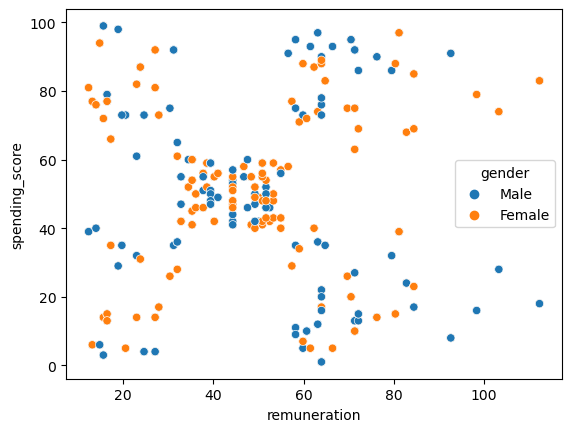

In [33]:
# Create a scatterplot with Seaborn.with data from remuneration and spending score
# to chack the distribution of data.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2,
                hue='gender')

### The scatterplot was developed to show the distribution of data regarding the remuneration and spending of customers categorised by sex. the cluster in the center shows a more or less even compostion of Male and Female customers earning about 40,000, but then the plot also shows a less dense clusters of cusotmers both Male and Female in brackets around 20,000 and between 60,000 to 100,000. Hence the Marketing Team of Turtle Games can start a campaign aiming the group within 40,000 earning bracket and and who all have a spening score of around 40-60. The other clusters will need furhter investigation as some high earners show low spending scores and some in the same bracket show high spending scores. 

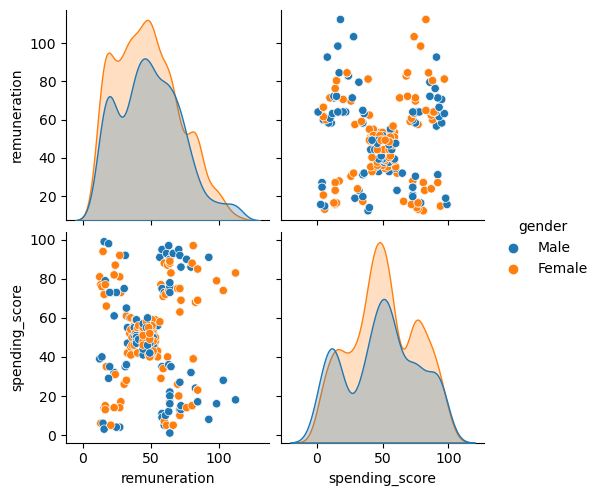

In [34]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             hue='gender',
             diag_kind='kde')

### the above pairplot shows a very interesting theme, where for the same spending score Male customers have lesser remuneration thatn Female customers which can be of interest to the Marketing Team who can now target specific products for the 2 categories. 

## 3. Elbow and silhoutte methods

#### two methods to be tried to determine the number of clusters to be used to get good conclusions.

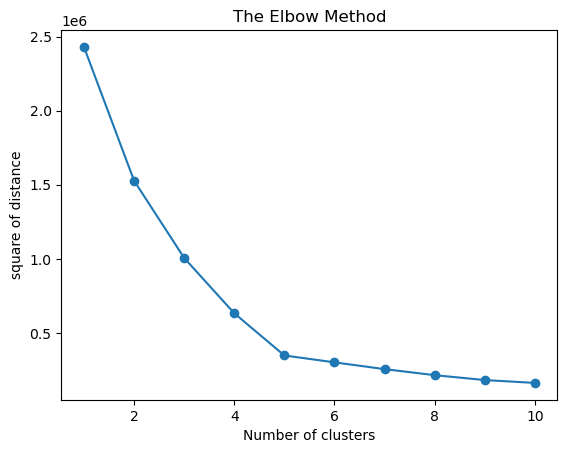

In [35]:
# To determine the number of clusters: Elbow method.
# Import the KMeans class from sklearn
from sklearn.cluster import KMeans 

# determine the optimal number of clusters
# where n_init = 10 is by default, i = iterate 10 times
# where max_iter is the maximum number of iterations to come to a conclusion
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=2000,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Show the correct labels and Titles
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("square of distance")

plt.show()

### as can be seen the elbow in this graph shows a figure between 4 and 6 and is more or less 5.

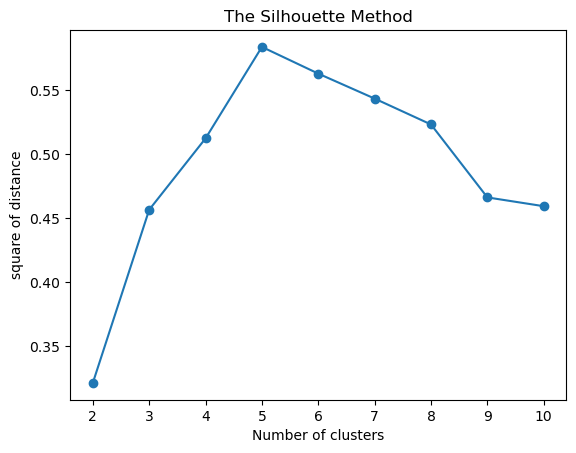

In [36]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
# kept kmax at 10 to ensure same number as the Elbow method for determining cluster numbers. 
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Give correct labels and Titles.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("square of distance")

plt.show()

### The silhoutte method to determine the number of clusters has also pointed to the number 5 which is good and takes out any ambiguity 

## 4. Evaluate k-means model at different values of *k*

#### k = number of clusters, to see the results with different number of clusters for optimum result

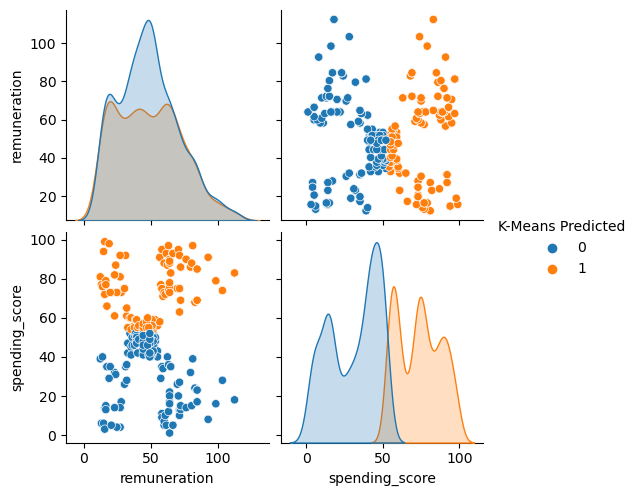

In [37]:
# Using two clusters as in gender = male or female
kmeans = KMeans(n_clusters = 2, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

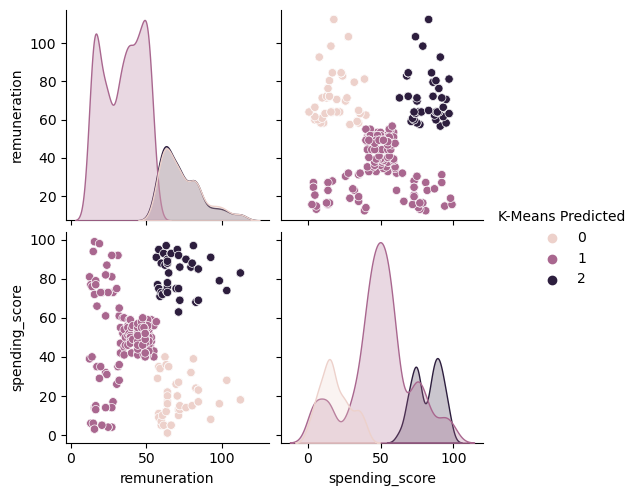

In [38]:
# Using three clusters
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

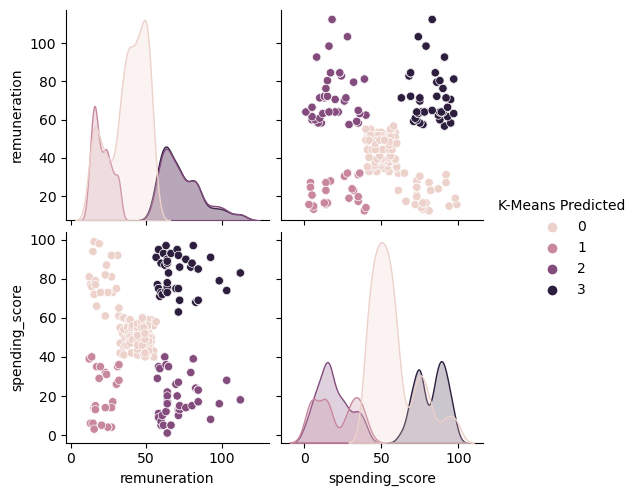

In [39]:
# Using four clusters
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

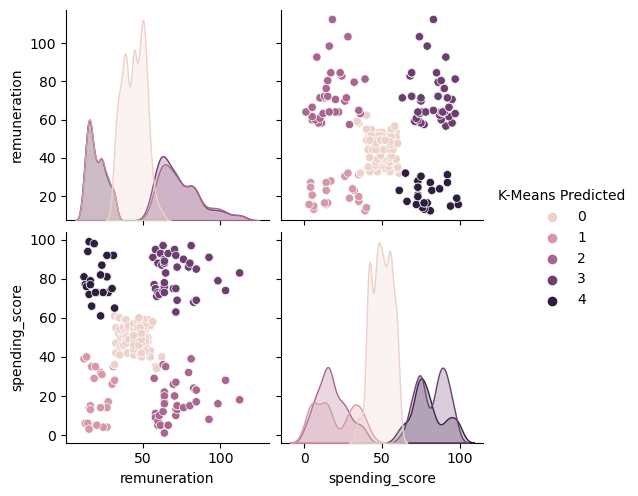

In [40]:
# Using five clusters as established by Elbow and Silhouette Method to be optimum
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

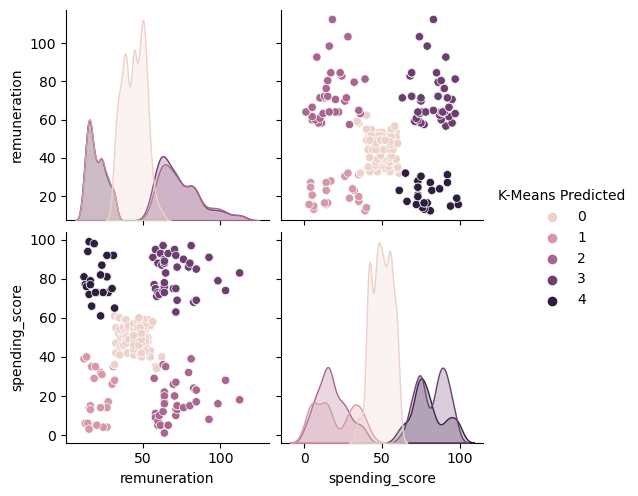

In [41]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

### Justification : 5 cluster model has been chosen because of the clarity of results. The correlation between spending score and remuneration is strong and the effect can be seen in terms of gender which is fixed and thus gives an idea of the specific customer groups regarding their spending and thus targeting that group which has the optimal level of spending versus remuneration and the placement of specific products for that group. 

In [42]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [43]:
# View the DataFrame.
x.head()

remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

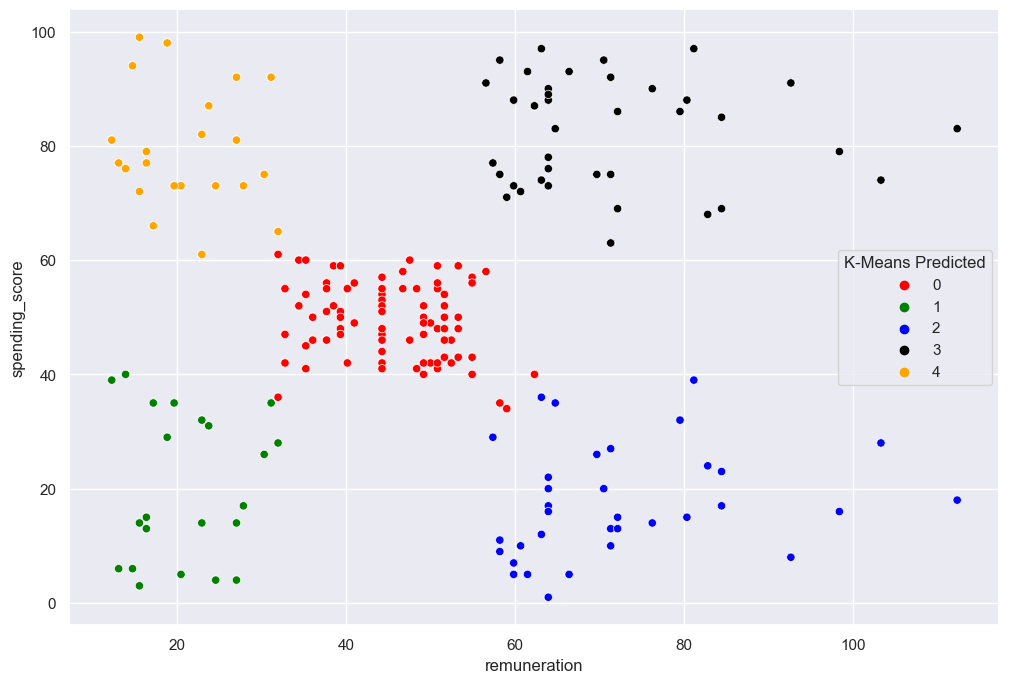

In [44]:
# Visualising the clusters using seaborn
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## 7. Discuss: Insights and observations

### plotting the data from **remuneration** and **spending** scores from the newly formed dataset **"reviews2"** shows that if gender were to be taken as a constant factor where it is split in 2 types "male" and "female", then a correlation can be seen between remuneration and spending scores corresponding to the gender type. The visual gives in indication of the specific market type and a clear classification and demarcation of the groups. target marketing of products can now be done to cover the speicific group where most sales can be achieved for that specific product. from the plot it can also be seen that higher remuneration necessarily does not mean higher spend and it could be attributed to customers in higher remuneration bracket may be spending on few items but higher prices. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [45]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

# nltk.download ('punkt').
# nltk.download ('stopwords').


from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [46]:
from wordcloud import WordCloud

In [47]:
# Load the data set as df3.
df3 = pd.read_csv('reviews2.csv')

# View DataFrame.
df3.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [48]:
# retain only the necessary columnds  by dropping columns not needed for analysis.
df4 = df3.drop(columns=['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product'])
# check if columns have been dropped
df4.columns

Index(['review', 'summary'], dtype='object')

In [49]:
# Explore data set.
df4.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [50]:
# check for the number of rows and columns
df4.shape

(2000, 2)

In [51]:
# check for any missing values
df4.isna().sum()

review     0
summary    0
dtype: int64

In [52]:
# delete any rows in both columns which do not have any value.
df4.dropna(subset=['review'], inplace=True)

# View DataFrame.
df4.shape

(2000, 2)

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [53]:
# Review: Change all to lower case and join with a space.
df4['review'] = df4['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# check if converted to lowercase
df4['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [54]:
# convert all to lowercase in the second column "Summary" and join
df4['summary'] = df4['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# check if the data has been converted to lowercase in the column
df4['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [55]:
# Replace all the punctuations in review column.
df4['review'] = df4['review'].str.replace('[^\w\s]','')

# View output.
df4['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [56]:
# Replace all the puncuations in summary column.
df4['summary'] = df4['summary'].str.replace('[^\w\s]','')

# View output.
df4['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

### check to see if any duplicates present in both columns

In [57]:
# check and see if any dupicates in "review" column
df4.review.duplicated().sum()

50

In [58]:
# delete the duplicates in the "review" column
df_drop_rev = df4.drop_duplicates(subset=['review'])

# View DataFrame.
df_drop_rev.reset_index(inplace=True)
df_drop_rev.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [59]:
# check and see if any dupicates in "summary" column
df4.summary.duplicated().sum()

649

In [60]:
# delete the duplicates in the "summary" column
df_drop_sum = df4.drop_duplicates(subset=['summary'])

# View DataFrame.
df_drop_sum.reset_index(inplace=True)
df_drop_sum.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

### check and see if the duplicates have been dropped by using "shape" function

In [61]:
df_drop_rev.shape

(1950, 3)

In [62]:
df_drop_sum.shape

(1351, 3)

### ***as can be seen from above numbers the duplicates have been deleted from both columns***

## 3. Tokenise and create wordclouds

### 3A] Create a Word Cloud to see which are the most frequently used words. 

### Create a Word Cloud for "review" column

In [63]:
# put all the comments in the "review" column into one variable for analysis
# Create an empty string variable.
rev_comm = ''
for i in range(df_drop_rev.shape[0]):
    rev_comm = rev_comm + df_drop_rev['review'][i]

In [64]:
# Create the Word Cloud 
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
rev_cloud = WordCloud(width = 1000, height = 500, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(rev_comm)

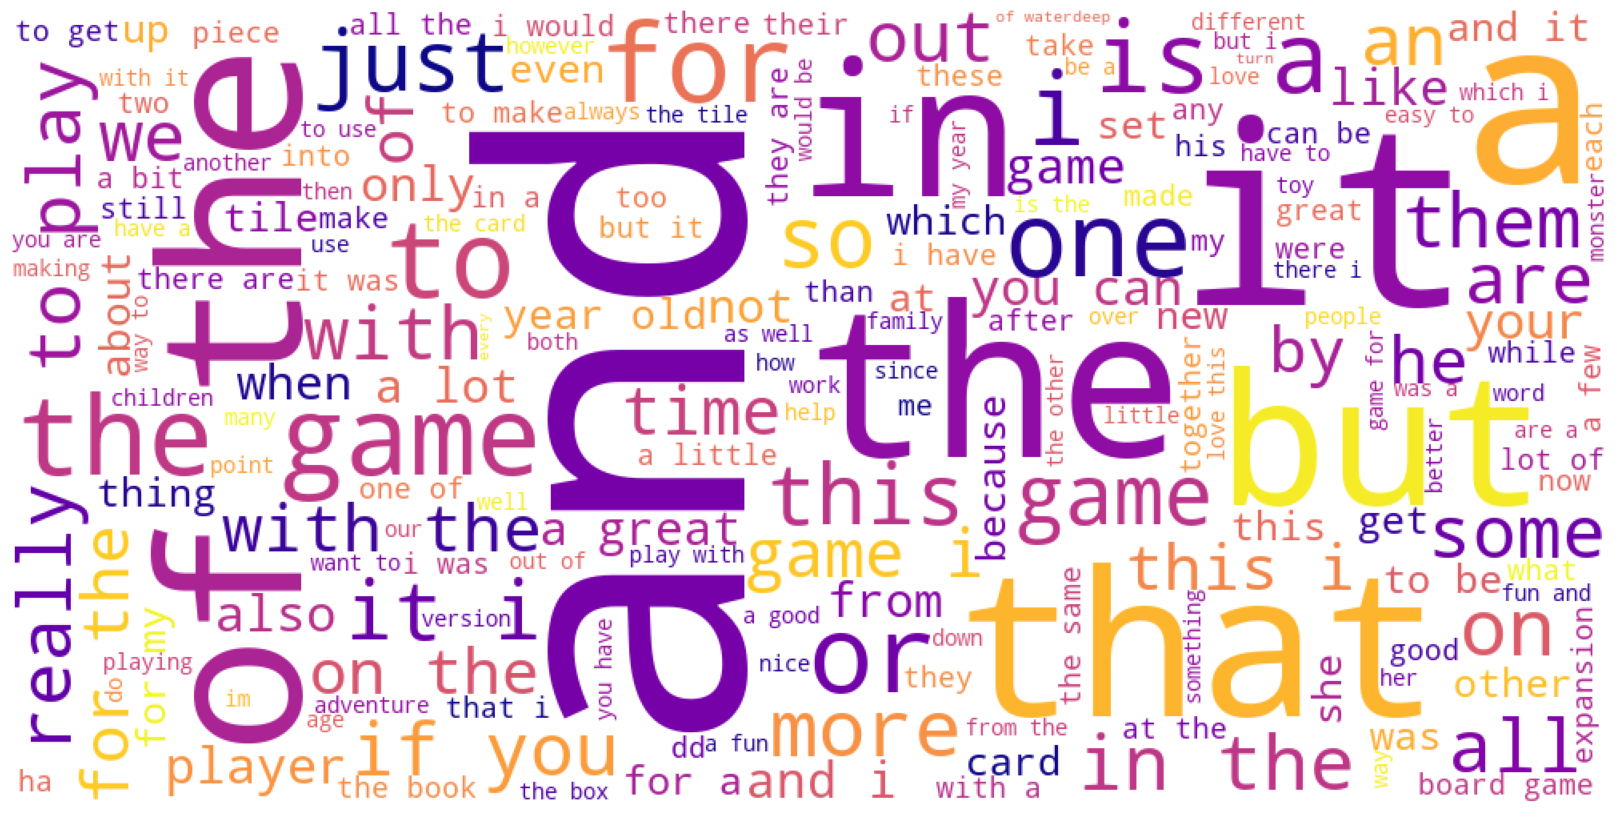

In [65]:
# create the word cloud image to check the most frequent words
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(rev_cloud) 
plt.axis('off')  
plt.tight_layout(pad = 0) 
plt.show()

### ***as can be seen from the above image that most frequent words are stopwords, and hence need to be removed for any meaningful analysis to be done. Tokensiation will be applied to this column to remove stop words and to re-create the word cloud to give a visual indication of which are the most frequent words and what conclusions can be drawn form the image.***

### Create a Word Cloud for "summary" column

In [66]:
# put all the comments in the "summary" column into one variable for analysis
# Create an empty string variable.
sum_comm = ''
for i in range(df_drop_sum.shape[0]):
    sum_comm = sum_comm + df_drop_sum['summary'][i]

In [67]:
# Create the Word Cloud 
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
sum_cloud = WordCloud(width = 1000, height = 500, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(sum_comm)

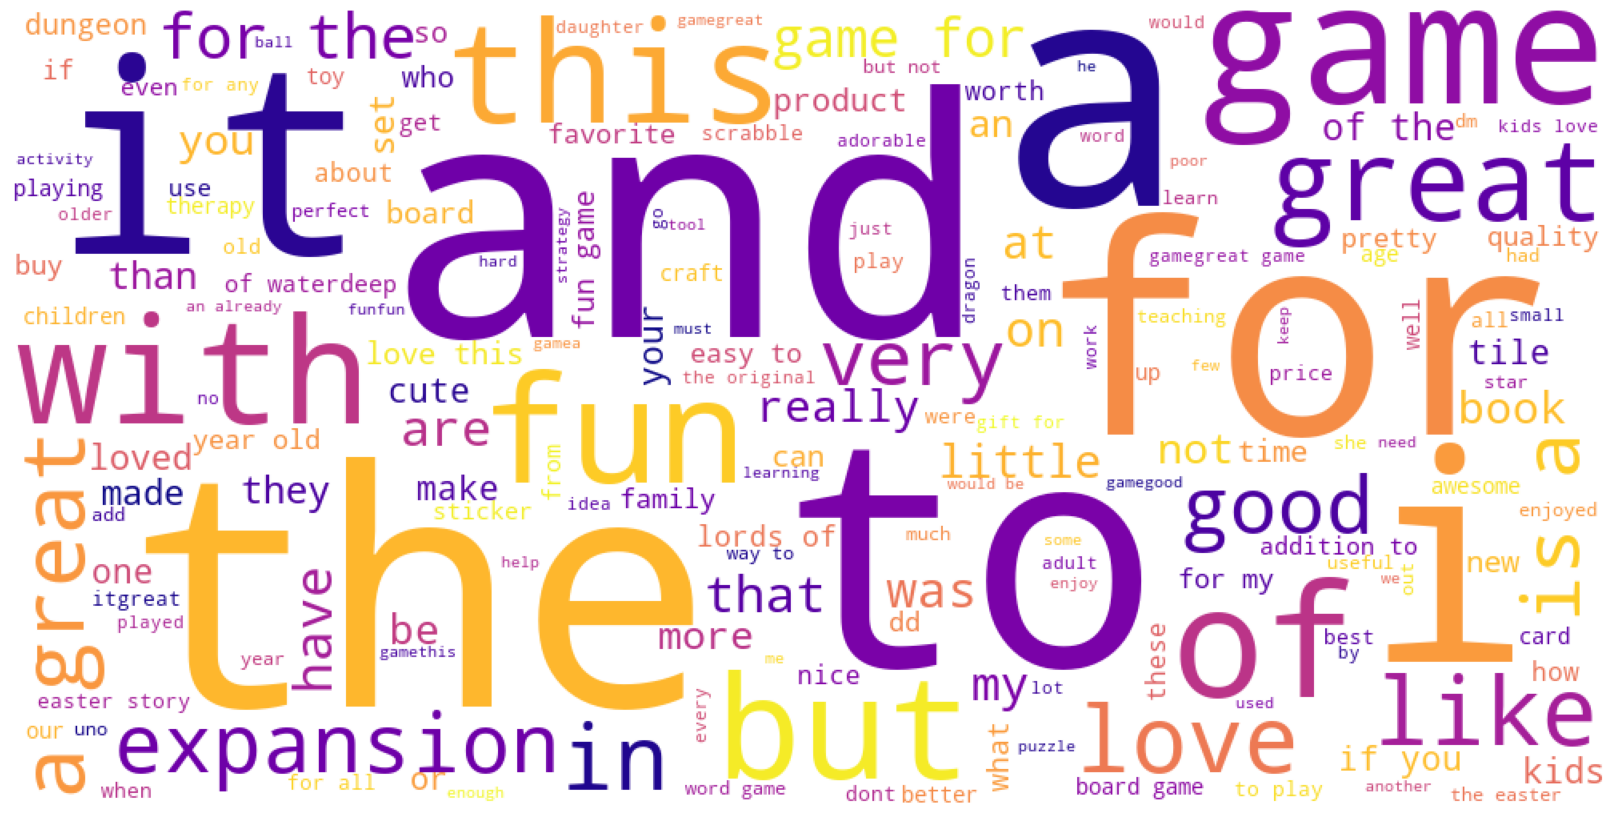

In [68]:
# create the word cloud image to check the most frequent words
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(sum_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### ***The above image clearly shows that the most frequent words are stop words and thus have to be eliminted from the columns to get any meaningful analysis done. Tokenisation will be applied to the "summary" column and the stopt words taken out to give a more clearer picture.***

## 3B] Tokenisation to be applied to the two columns 

### Tokenise the "review" column

In [69]:
# Tokenise the words.
df_drop_rev['tokens'] = df_drop_rev['review'].apply(word_tokenize)

# Preview data.
df_drop_rev['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [70]:
# Define an empty list of tokens.
rev_tokens = []

for i in range(df_drop_rev.shape[0]):
    # Add each token to the list.
    rev_tokens = rev_tokens + df_drop_rev['tokens'][i]

In [71]:
# check the list
rev_tokens

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

### Tokenise the "summary" column

In [72]:
# Tokenise the words.
df_drop_sum['tokens'] = df_drop_sum['summary'].apply(word_tokenize)

# Preview data.
df_drop_sum['tokens']

0       [the, fact, that, 50, of, this, space, is, was...
1       [another, worthless, dungeon, masters, screen,...
2                    [pretty, but, also, pretty, useless]
3                                           [five, stars]
4                                           [money, trap]
                              ...                        
1346    [this, is, a, fun, card, game, for, people, wh...
1347    [sort, of, a, card, game, equivalent, of, scra...
1348           [great, game, to, keep, the, mind, active]
1349                               [a, great, mind, game]
1350    [the, perfect, word, game, for, mixed, ages, w...
Name: tokens, Length: 1351, dtype: object

In [73]:
# Define an empty list of tokens.
sum_tokens = []

for i in range(df_drop_sum.shape[0]):
    # Add each token to the list.
    sum_tokens = sum_tokens + df_drop_sum['tokens'][i]

In [74]:
# check the tokens in the list
sum_tokens

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'best',
 'gm',
 'screen',
 'ever',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'ever',
 'seen',
 'not',
 'enough',
 'product',
 'good',
 'product',
 'but',
 

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [75]:
# Create the frequency distribution to see the number of times each word occurs in the "review" column
revdist = FreqDist(rev_tokens)

# Preview data.
revdist

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

In [76]:
# take out tokens which are not alphanumeric
review = [word for word in rev_tokens if word.isalnum()]

### The frequency distribution clearly shows the proliferation of stop words, removing these should give more clarity in terms of analysis

In [77]:
# Create the frequency distribution to see the number of times each word occurs in the "summary" column
sumdist = FreqDist(sum_tokens)

# Preview data.
sumdist

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [78]:
# take out tokens which are not alphanumeric
summary = [word for word in sum_tokens if word.isalnum()]

In [79]:
summary

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'best',
 'gm',
 'screen',
 'ever',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'ever',
 'seen',
 'not',
 'enough',
 'product',
 'good',
 'product',
 'but',
 

### the above frequency numbers for the summary column show less stop words but are still there in enough numbers to warrant elimintaion for a proper analysis

## 4b) Remove numeric characters and stopwords

### 4b1] Delete Stop Words from the "review" column

In [80]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
review1 = [x for x in review if x.lower() not in english_stopwords]

# Define an empty string variable.
review1_string = ''

for value in review1:
    # Add each filtered token word to the string.
    review1_string = review1_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
# list of tokens without stop words but with numeric values
review1_string

'comes dms screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely open letter galeforce9 unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure lands outside forgot

### 4b1] Delete numeric values form "review" column

In [82]:
# Delete all the numeric characters, leaving only wirds for analysis.
review2_string = ''.join(filter(lambda x: not x.isdigit(), review1_string))

In [83]:
# to check if the numbers have been deleted form the column, leaving behind words.
review2_string

'comes dms screen space screen absolute premium fact  space wasted art terribly informative needed art well makes completely useless reason gave  stars  technically speaking least still stand block notes dice rolls drops ball completely open letter galeforce unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure lands outside forgotten r

### 4b2] Delete stop words from "summary" column

In [84]:
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
summary1 = [x for x in summary if x.lower() not in english_stopwords]

# Define an empty string variable.
summary1_string = ''

for value in summary1:
    # Add each filtered token word to the string.
    summary1_string = summary1_string + value + ' '

In [85]:
# list of tokens with numeric values but with stop words taken out
summary1_string

'fact 50 space wasted art terribly informative needed art another worthless dungeon masters screen galeforce9 pretty also pretty useless five stars money trap best gm screen ever great could even better another missed opportunity value add product line love map general dm screen weak game fell completely flat good book buckley card mommer advanced good gets better know youre getting dont bother worst value ive ever seen enough product good product temporary tattoos good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done relaxation beautiful coloring book pictures great ive done one gave great buy cant wait work book stained glass perfection four stars beautiful nice three stars like every image contained stained glass coloring book creative stained glass pictures nice pictures great transaction drawings nice put windows great 30 minute toy great ok best fun robot themed gift 6 yr old great party thank bag addition tiny b

### 4b2] Delete numeric values form "summary" column

In [86]:
# Delete all the numeric characters, leaving only words for analysis.
summary2_string = ''.join(filter(lambda x: not x.isdigit(), summary1_string))

In [87]:
# to check if the codeline above did its work and deleted the numeric values from the column
summary2_string

'fact  space wasted art terribly informative needed art another worthless dungeon masters screen galeforce pretty also pretty useless five stars money trap best gm screen ever great could even better another missed opportunity value add product line love map general dm screen weak game fell completely flat good book buckley card mommer advanced good gets better know youre getting dont bother worst value ive ever seen enough product good product temporary tattoos good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done relaxation beautiful coloring book pictures great ive done one gave great buy cant wait work book stained glass perfection four stars beautiful nice three stars like every image contained stained glass coloring book creative stained glass pictures nice pictures great transaction drawings nice put windows great  minute toy great ok best fun robot themed gift  yr old great party thank bag addition tiny book sa

### 4c) Create wordcloud without stopwords and numeric values

### 4c1] create word cloud for "review" column

In [88]:
# create a word cloud object called rev_cloud for "review" column
rev_cloud = WordCloud(width = 1000, height = 500, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review2_string)

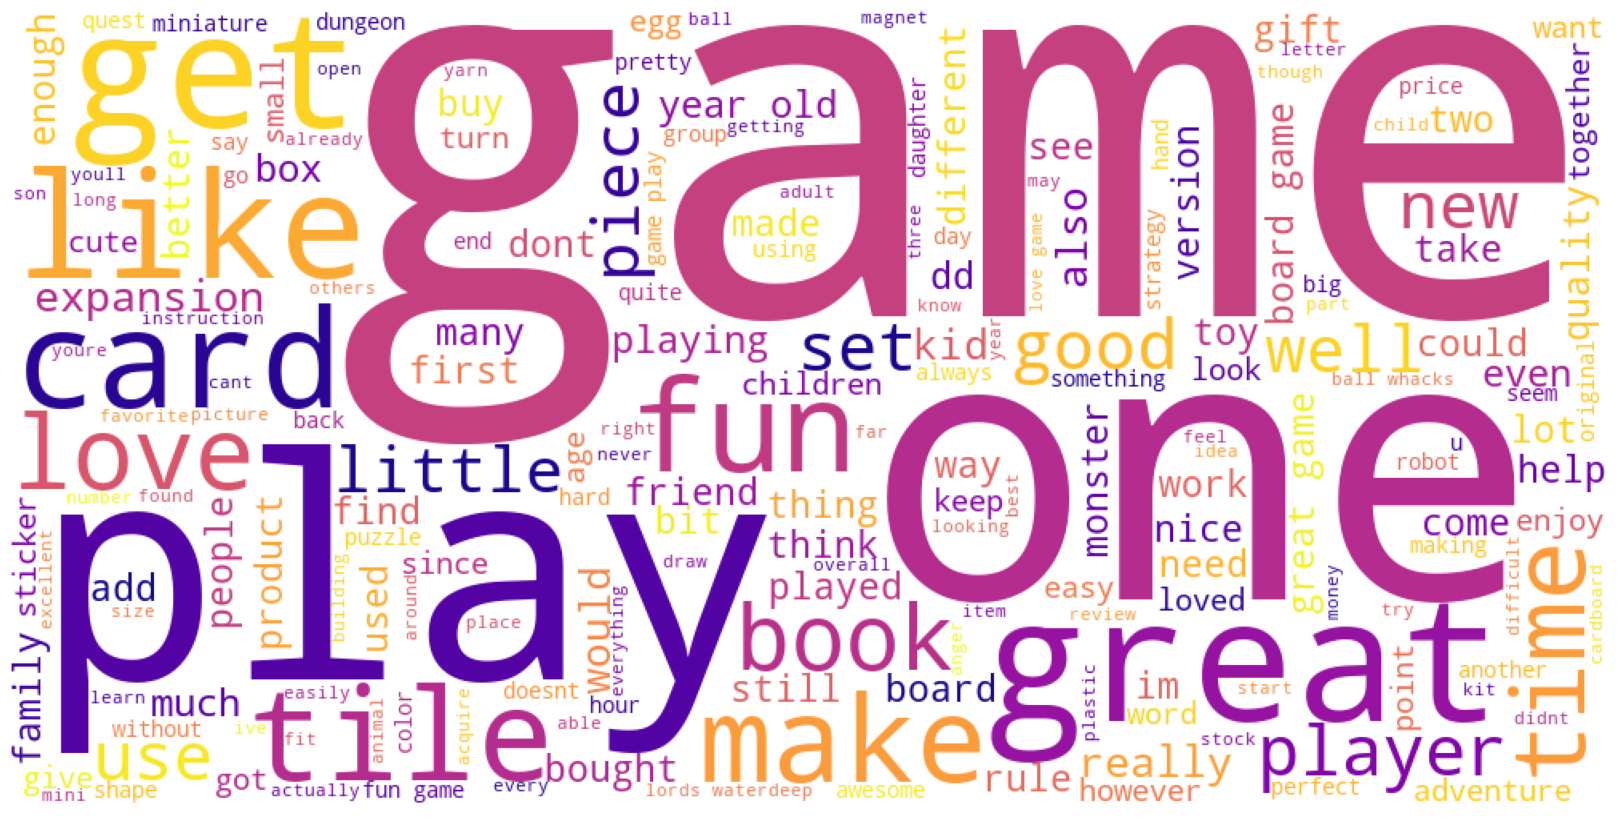

In [89]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(rev_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4c2] create word cloud for "summary" column

In [90]:
# create a word cloud object called sum_cloud for the "summary" column
sum_cloud = WordCloud(width = 1000, height = 500, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summary2_string)

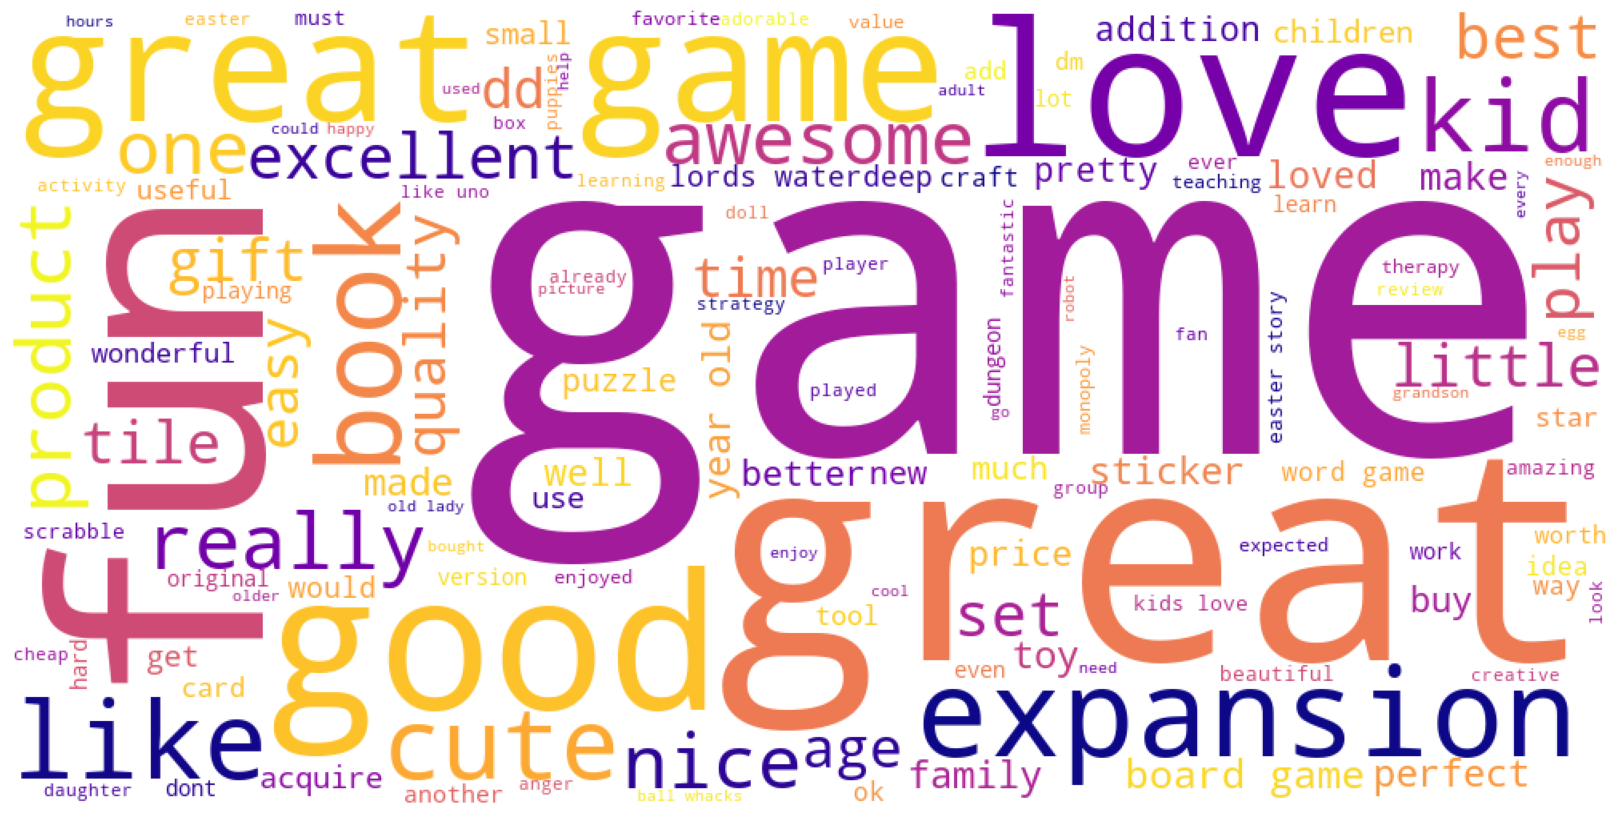

In [91]:
# create word cloud image
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(sum_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words that occur in the columns

### 4d1] 15 most frequent words that are found in the "review" column

In [92]:
# View the frequency distribution.
revdist1 = FreqDist(review1)

# Preview the data.
revdist1

FreqDist({'game': 1668, 'great': 579, 'fun': 549, 'one': 530, 'play': 502, 'like': 414, 'love': 322, 'really': 319, 'get': 319, 'cards': 301, ...})

In [93]:
revcounts = pd.DataFrame(Counter(review1).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
revcounts

Frequency
Word             
game         1668
great         579
fun           549
one           530
play          502
like          414
love          322
really        319
get           319
cards         301
tiles         297
time          291
good          287
would         280
book          273

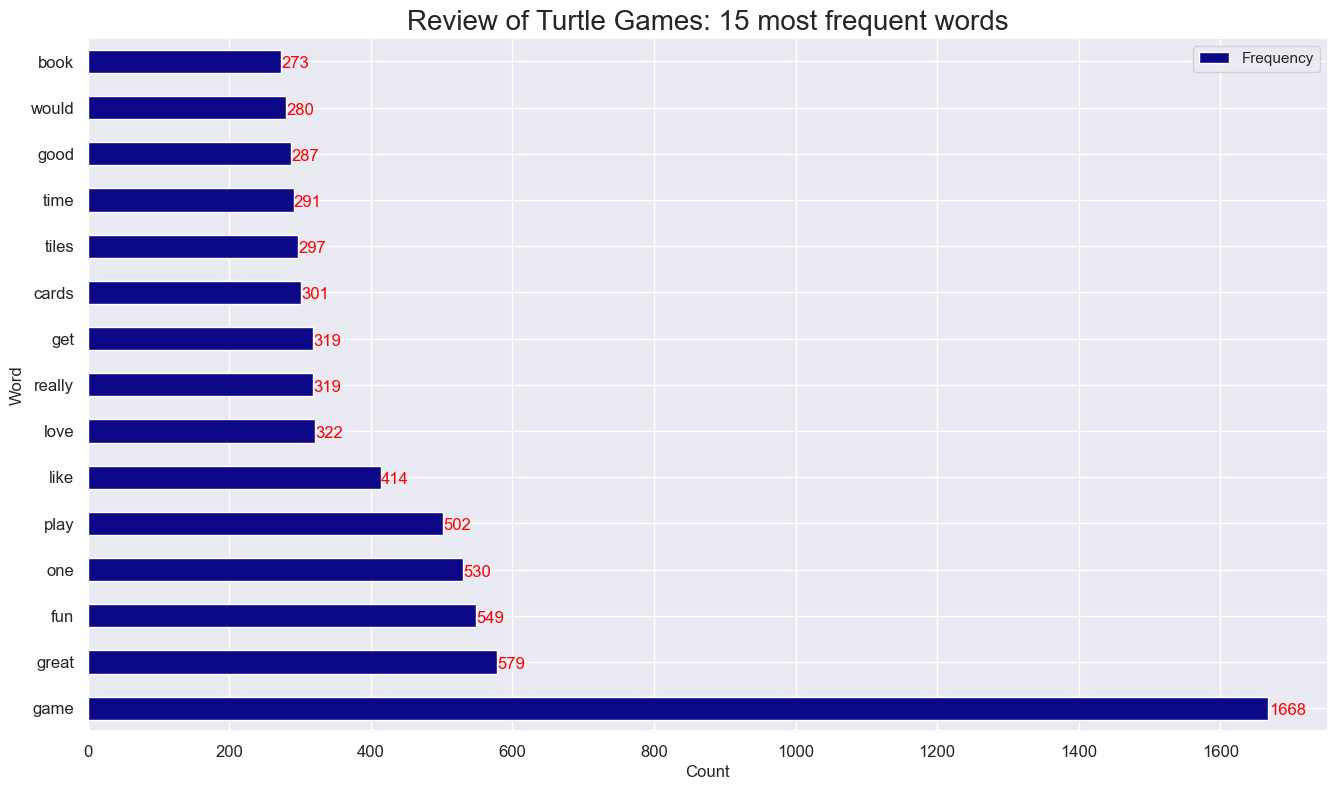

In [94]:
ax = revcounts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review of Turtle Games: 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### the above graph was plotted to visualise the most popular words in the review of Turtle Games and to determine how much of an impact those games are making over the gamers. And clearly words asscoiated with enjoyment, immersive play, entertainment are visible in the visualisation in the form of "like", "great", "fun". This can be interpreted that the games are indeed making a positive impact on the gamers and that Turtle Games is on the right path, now it has tackle the challenge of keeping it that way and to make them even more alluring and enjoyable.

### 4d2] 15 most frequent words that are found in the "summary" column

In [95]:
# View the frequency distribution.
sumdist1 = FreqDist(summary1)

# Preview the data.
sumdist1

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [96]:
sumcounts = pd.DataFrame(Counter(summary1).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
sumcounts

Frequency
Word                
game             268
great            237
fun              175
good              84
love              70
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               30
nice              28
one               28

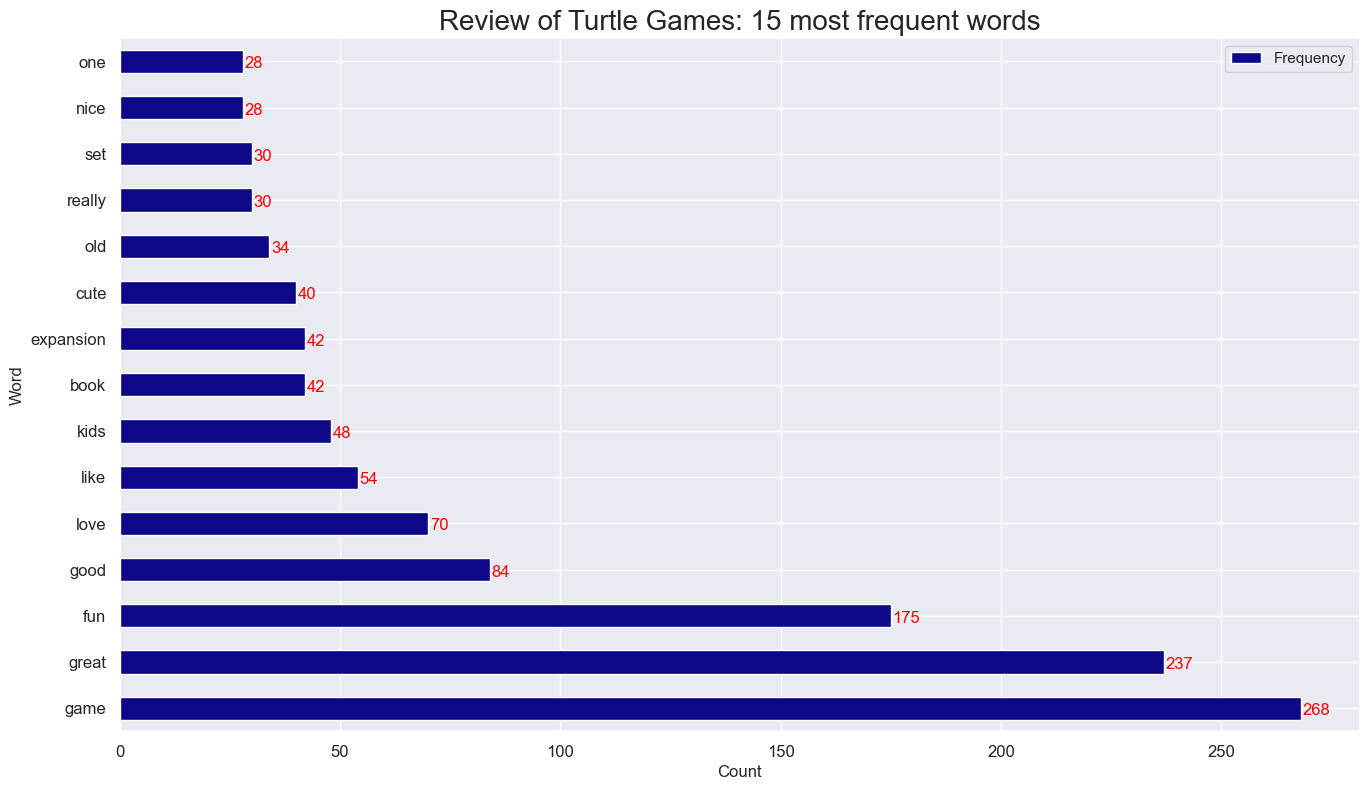

In [97]:
ax = sumcounts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review of Turtle Games: 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### The above visual of the summary of all reviews shows clearly that words suggesting enjoyment, entertainment, engagment, satisfaction stand out and are associated with game. Another significant word that stands out is "kids", clearly showing that Turtle Games are enjoyed bya  younger group of players, who potentially may stay loyal to Turtle Games and represent a growing pool of players who can be targeted with marketing to gain weightage and popularity and thus ultimately growth of company.

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [98]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

### 5A] Create Sentiment  and Polarity scores for both columns

### 5a1] create polarity score for "review" column

In [99]:
# create a new column with polarity scores for each comment.
df_drop_rev['polarity'] = df_drop_rev['review'].apply(generate_polarity)

# Preview the result.
df_drop_rev['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

### 5a1] create sentiment types for the "review" column

In [100]:
df_drop_rev['sentiment'] = ''
df_drop_rev.loc[df_drop_rev.polarity>0, 'sentiment'] = 'positive'
df_drop_rev.loc[df_drop_rev.polarity==0, 'sentiment'] = 'neutral'
df_drop_rev.loc[df_drop_rev.polarity<0, 'sentiment'] = 'negative'
df_drop_rev.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                              tokens  polarity sentiment  
0  [when, it, comes, to, a, dms, screen, the, spa... -0.036111  negative  
1  [an, open, letter, to, galeforce9, your, unpai...  0.035952  positive  
2  [nice, art, nice, printing, why, two, panels, ...  0.116640  positive  
3  [amazing, buy, bought, it, as, a, gift, for, o...  0.578788  positive  
4  [as, my, review, of, gf9s, previous, screens, ... -0.316667  negative

### 5a2] Create Polarity scores for the "summary" column

In [101]:
# create a new column with polarity scores for each comment.
df_drop_sum['polarity'] = df_drop_sum['summary'].apply(generate_polarity)

# Preview the result.
df_drop_sum['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

### 5a2] Create Sentiment types for the "summary" column

In [102]:
df_drop_sum['sentiment'] = ''
df_drop_sum.loc[df_drop_sum.polarity>0, 'sentiment'] = 'positive'
df_drop_sum.loc[df_drop_sum.polarity==0, 'sentiment'] = 'neutral'
df_drop_sum.loc[df_drop_sum.polarity<0, 'sentiment'] = 'negative'
df_drop_sum.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                              tokens  polarity sentiment  
0  [the, fact, that, 50, of, this, space, is, was...      0.15  positive  
1  [another, worthless, dungeon, masters, screen,...     -0.80  negative  
2               [pretty, but, also, pretty, useless]      0.00   neutral  
3                                      [five, stars]      0.00   neutral  
4                                      [money, trap]      0.00   neutral

## 5B] Create Histograms for Polarity and Sentiment for both columns

### 5b1] Histogram for the polarity scores for the "review" column

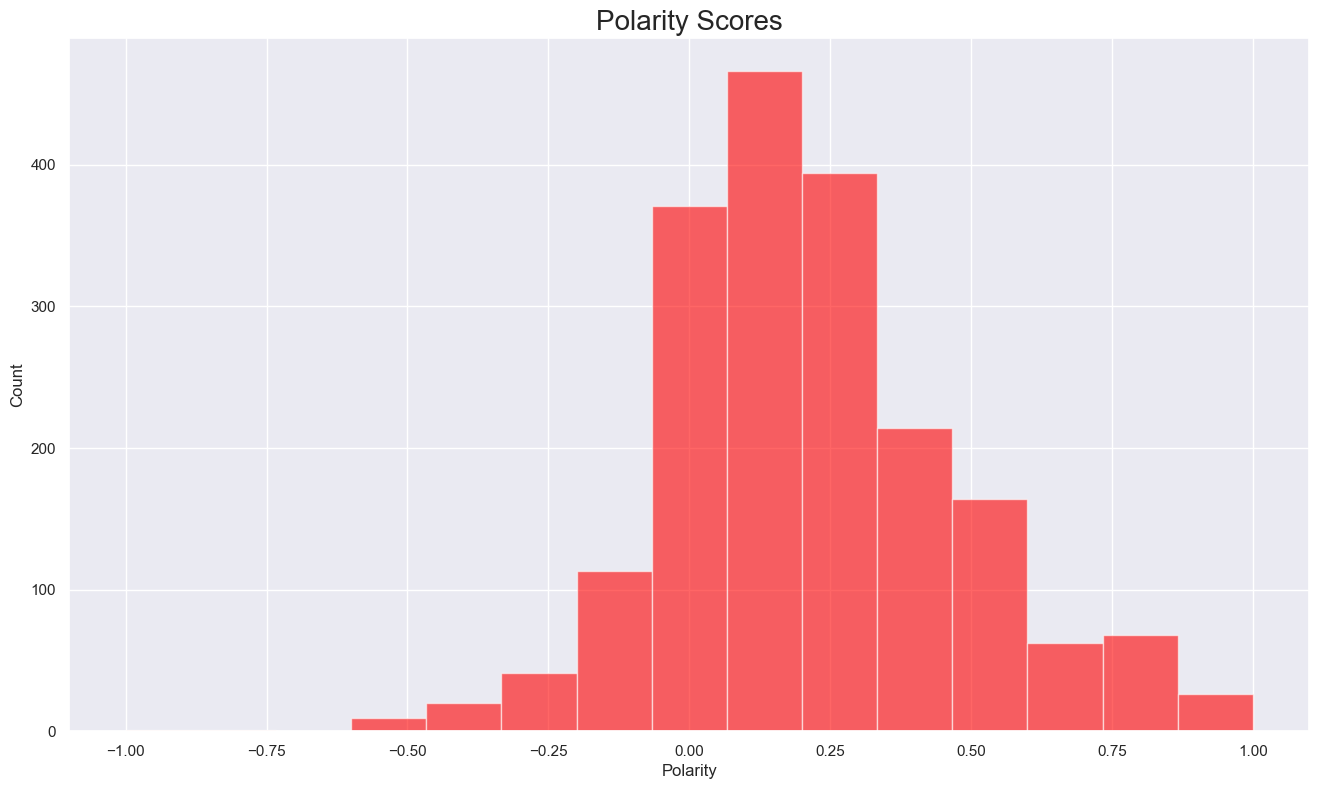

In [103]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_drop_rev['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Polarity Scores', fontsize=20)

plt.show()

### the above histogram for polarity scores for the review of Turtle Games shows a big shift towards positive sentiment and reviews suggest customers are impressed with the games and are good potential customers for further purchases.

### 5b1] Histogram for the sentiment for "review" column

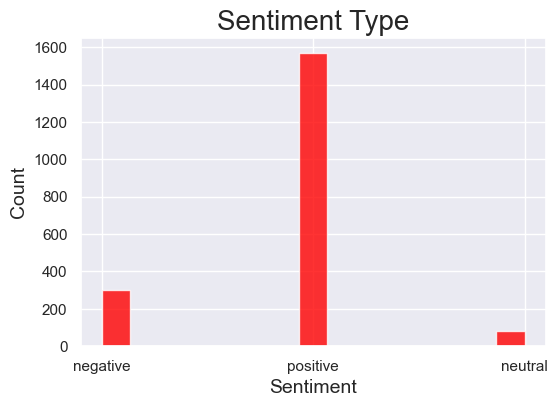

In [104]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(6,4))

# Define the bars.
n, bins, patches = plt.hist(df_drop_rev['sentiment'], num_bins, facecolor='red', alpha=0.8)

# Set the labels.
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Sentiment Type', fontsize=20)

plt.show()

### the histogram for the sentiment for Turtle Games is overwhelmingly positive and that is good news for the Marketing Team as that means not only are the games themselves a big attraction but also the earlier campaigns jave worked and a good customer base is developing.

### 5b2] Histogram for Polarity score for the "summary" column

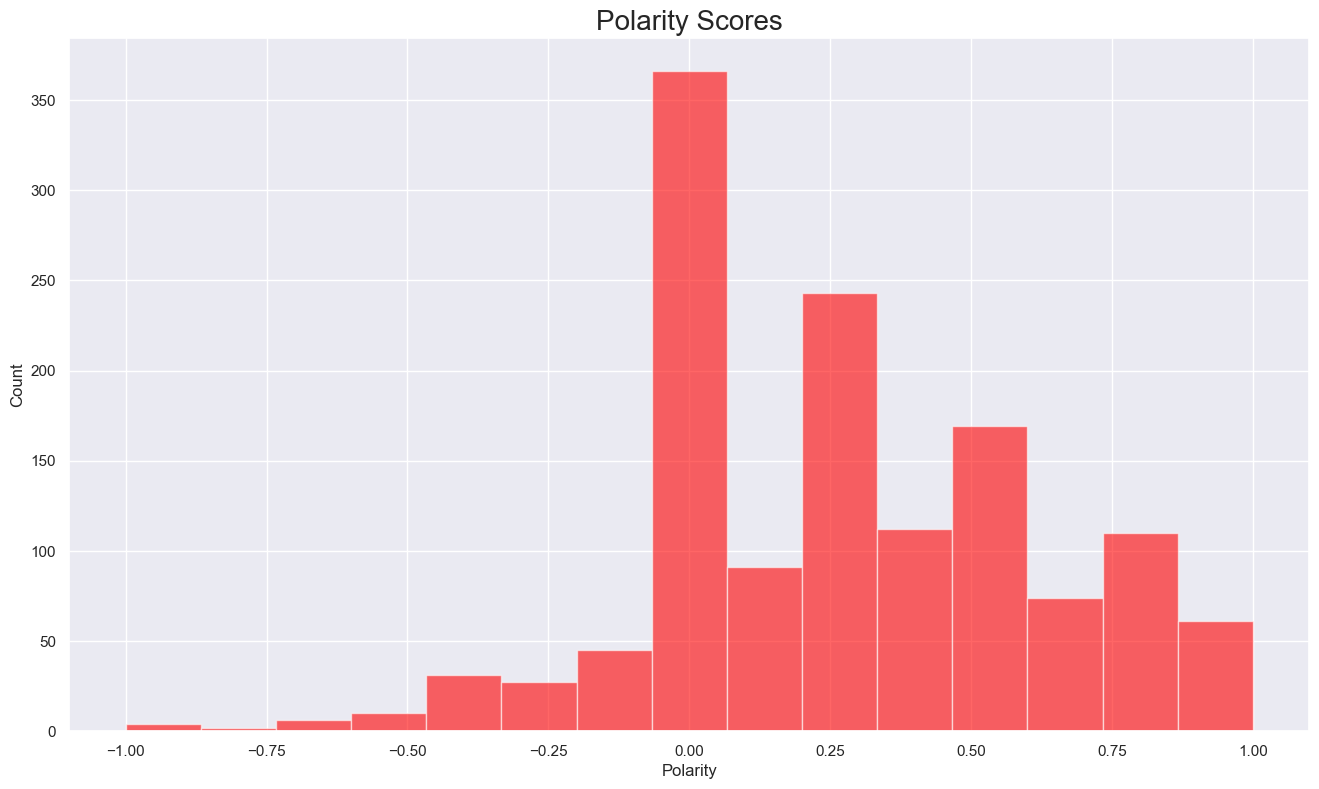

In [105]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_drop_sum['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Polarity Scores', fontsize=20)

plt.show()

### the histogram for the summary of experience of Turtle Games is completely skewered a positive sentiment and the polarity scores are very much in favour of sentiment of customers willing to engage even more with Turtle Games and to become loyal customers.

### 5b2] Histogram of Sentiment types for the "summary" column

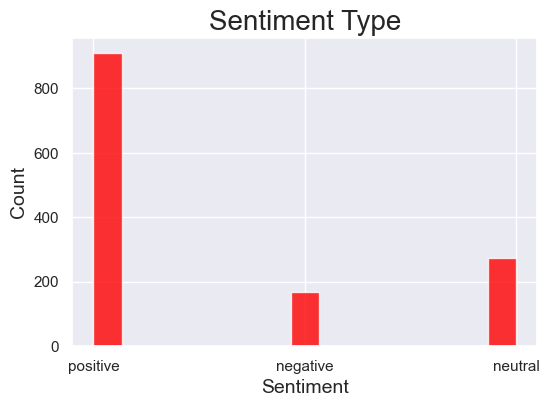

In [106]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(6,4))

# Define the bars.
n, bins, patches = plt.hist(df_drop_sum['sentiment'], num_bins, facecolor='red', alpha=0.8)

# Set the labels.
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Sentiment Type', fontsize=20)

plt.show()

### the histogram for the summary of the experience of Turtle Games shows some interesting propositions.Overwhelming reposnse has been positive, but yet there are quite a few number of customers who are not decided and perhaps may wish to experience more of games that Turtle Games has to offer before becoming loyal customers. Marketing Team will have to have a look that. 

## 6. Identify top 20 positive and negative reviews and summaries respectively

### 6A1] Negative reviews for the "review" column 

In [107]:
# Top 20 negative reviews.
# Create a DataFrame to store the results
negative_sentiment = df_drop_rev.nsmallest(20, 'polarity')

# Only keep the necessary columns to display positive reviews.
negative_sentiment = negative_sentiment[['review', 'polarity', 'sentiment']]

# keep appropriate column width to accomodate sentences without breaking them. 
negative_sentiment.style.set_properties(subset='review', **{'width': '1200px'})
# View output.

### 6A1] Negative reviews for the "summary" column 

In [108]:
# Top 20 negative summaries.
# Create a DataFrame to store the results
negative_sentiment = df_drop_sum.nsmallest(20, 'polarity')

# Only keep the necessary columns to display positive reviews.
negative_sentiment = negative_sentiment[['summary', 'polarity', 'sentiment']]

# keep appropriate column width to accomodate sentences without breaking them. 
negative_sentiment.style.set_properties(subset='summary', **{'width': '600px'})
# View output and adjust width to fit the comments

### 6A2] Top 20 Positive reviews for the "review" column 

In [109]:
# Top 20 positive reviews.
# Create a DataFrame to store the results
positive_sentiment = df_drop_rev.nlargest(20, 'polarity')

# Only keep the necessary columns to display positive reviews.
positive_sentiment = positive_sentiment[['review', 'polarity', 'sentiment']]

# keep appropriate column width to accomodate sentences without breaking them. 
positive_sentiment.style.set_properties(subset='review', **{'width': '400px'})
# View output and adjust width 

### 6A2] Top 20 Positive reviews for the "summary" column 

In [110]:
# Top 20 positive summaries.
# Create a DataFrame to store the results
positive_sentiment = df_drop_sum.nlargest(20, 'polarity')

# Only keep the necessary columns to display positive reviews.
positive_sentiment = positive_sentiment[['summary', 'polarity', 'sentiment']]

# keep appropriate column width to accomodate sentences without breaking them. 
positive_sentiment.style.set_properties(subset='summary', **{'width': '400px'})

# check the output of the code for width 

## 7. Discuss: Insights and observations

 ### An analysis of the most frequent words from the review of all Turtle Games who make all kinds of games from Board games to activities that involving building something, shows more of positive sentiment and many words that stand out show satisfaction of expectation, enjoyment, immersive play, enterntainment. This goes to show that Turtle Games have a good thing going and must accelerate that trend and the Marketing Team will have to tap into that positive sentiment and build up the brand even further, thus getting the present customers to become loyal and purchase more. Many words like "like", "love", "fun", "great", "delightful", "awesome", "excellent", "wonderful" can be found among the reviews and that points to engagement with the games which customers have found captivating and enjoyable and hence a word-of-mouth spread can be expected. 
### This point has to be picked up by the Marketing Team and perhaps launch marketing campaigns which highlight the enjoyment factor and also include the positive sentiment to promote the games vis-a-vis the competitors. Another word that stood out which will need to be looked at was "kids", this means the products are being bought for kids to enjoy and that means the Marketing Team will have to look at campaigns and advertising that will magnify the enjoyment, entertainment, ease of playing and highlight the fun factor which is important to kids and that generation of game players. This is a growing pool of customers and should now be targeted to encourage growth of the company. 
### Turning to the actual reviews itself and again mostly positive ones with customers mentioning how easy it was to play to what fun it was and that it was simply awesome. The earlier graphs plotted on this information clearly show a overwhelming sentiment to engage with Turtle Games and to experience the fun they provide so the Marketing Team would have to target that sentiment and design campaigns that show the fun factor, especially for the younger generation. Negative comments were also present though they were mainly regarding the quality of the product and either lack of improper instructions of use of the game or too complicated and most kids unable to understand how to play the game or assemble the activity. Some comments even mentioned anger control and that would probably refer to video games and console games and that should be looked at by the Marketing Team as that could potentially be a challenge if that sentiment would spread especially through social media. 
### To summarise: big positive sentiment at the present for Turtle Games and it seems the yound=ger generation are more and more engaging with their products and that is a big marlet to tap into. it is possible a combination of good quality of products and creative games, good advertising campaigns have helped the company grow its sales and standing among customers. Going forward the Team will have to target the growing pool of young customers and design specific campaigns. The only caus eof concenr can be the "anger control" mentioned in a few negative reviews which has to be addressed as it involves the mental makeup of the person playing the game and any change can cause the customer to air their veiws on social media which can have an effect on the reputation and the rating of the company and thus have  adetrimental effect on the sales.But so far so good for the company and it shows that the Marketing Team are on the right track and can account themselves for the success of the company, but the challenge is now to keep it going. 